# House Prices Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
house_prices = pd.read_csv("train.csv")
df = house_prices.copy()

# Summarize Data

In [2]:
df.shape

(1460, 81)

Our House Prices data has 1460 rows and 81 columns.

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

### Number of Numerical and Categorical features

In [6]:
numeric_features = df.dtypes[df.dtypes != "object"].index
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Numerical features: ", len(numeric_features))
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  38
Number of Categorical features:  43


For data types, our dataset has 38 numerical and 43 categorical features.

# Missing Values

Let's look at the percentage of missing values in our dataset with count_missing_data function.

In [7]:
def count_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    dtype = data.dtypes
    missing_data = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
    return missing_data.head(20)
    
count_missing_data(df)

,Total,Percent,Data Type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object


In our data, 19 features have missing values with PoolQC being the highest one with 0.99% missing values.

# Distributions of Numeric Features

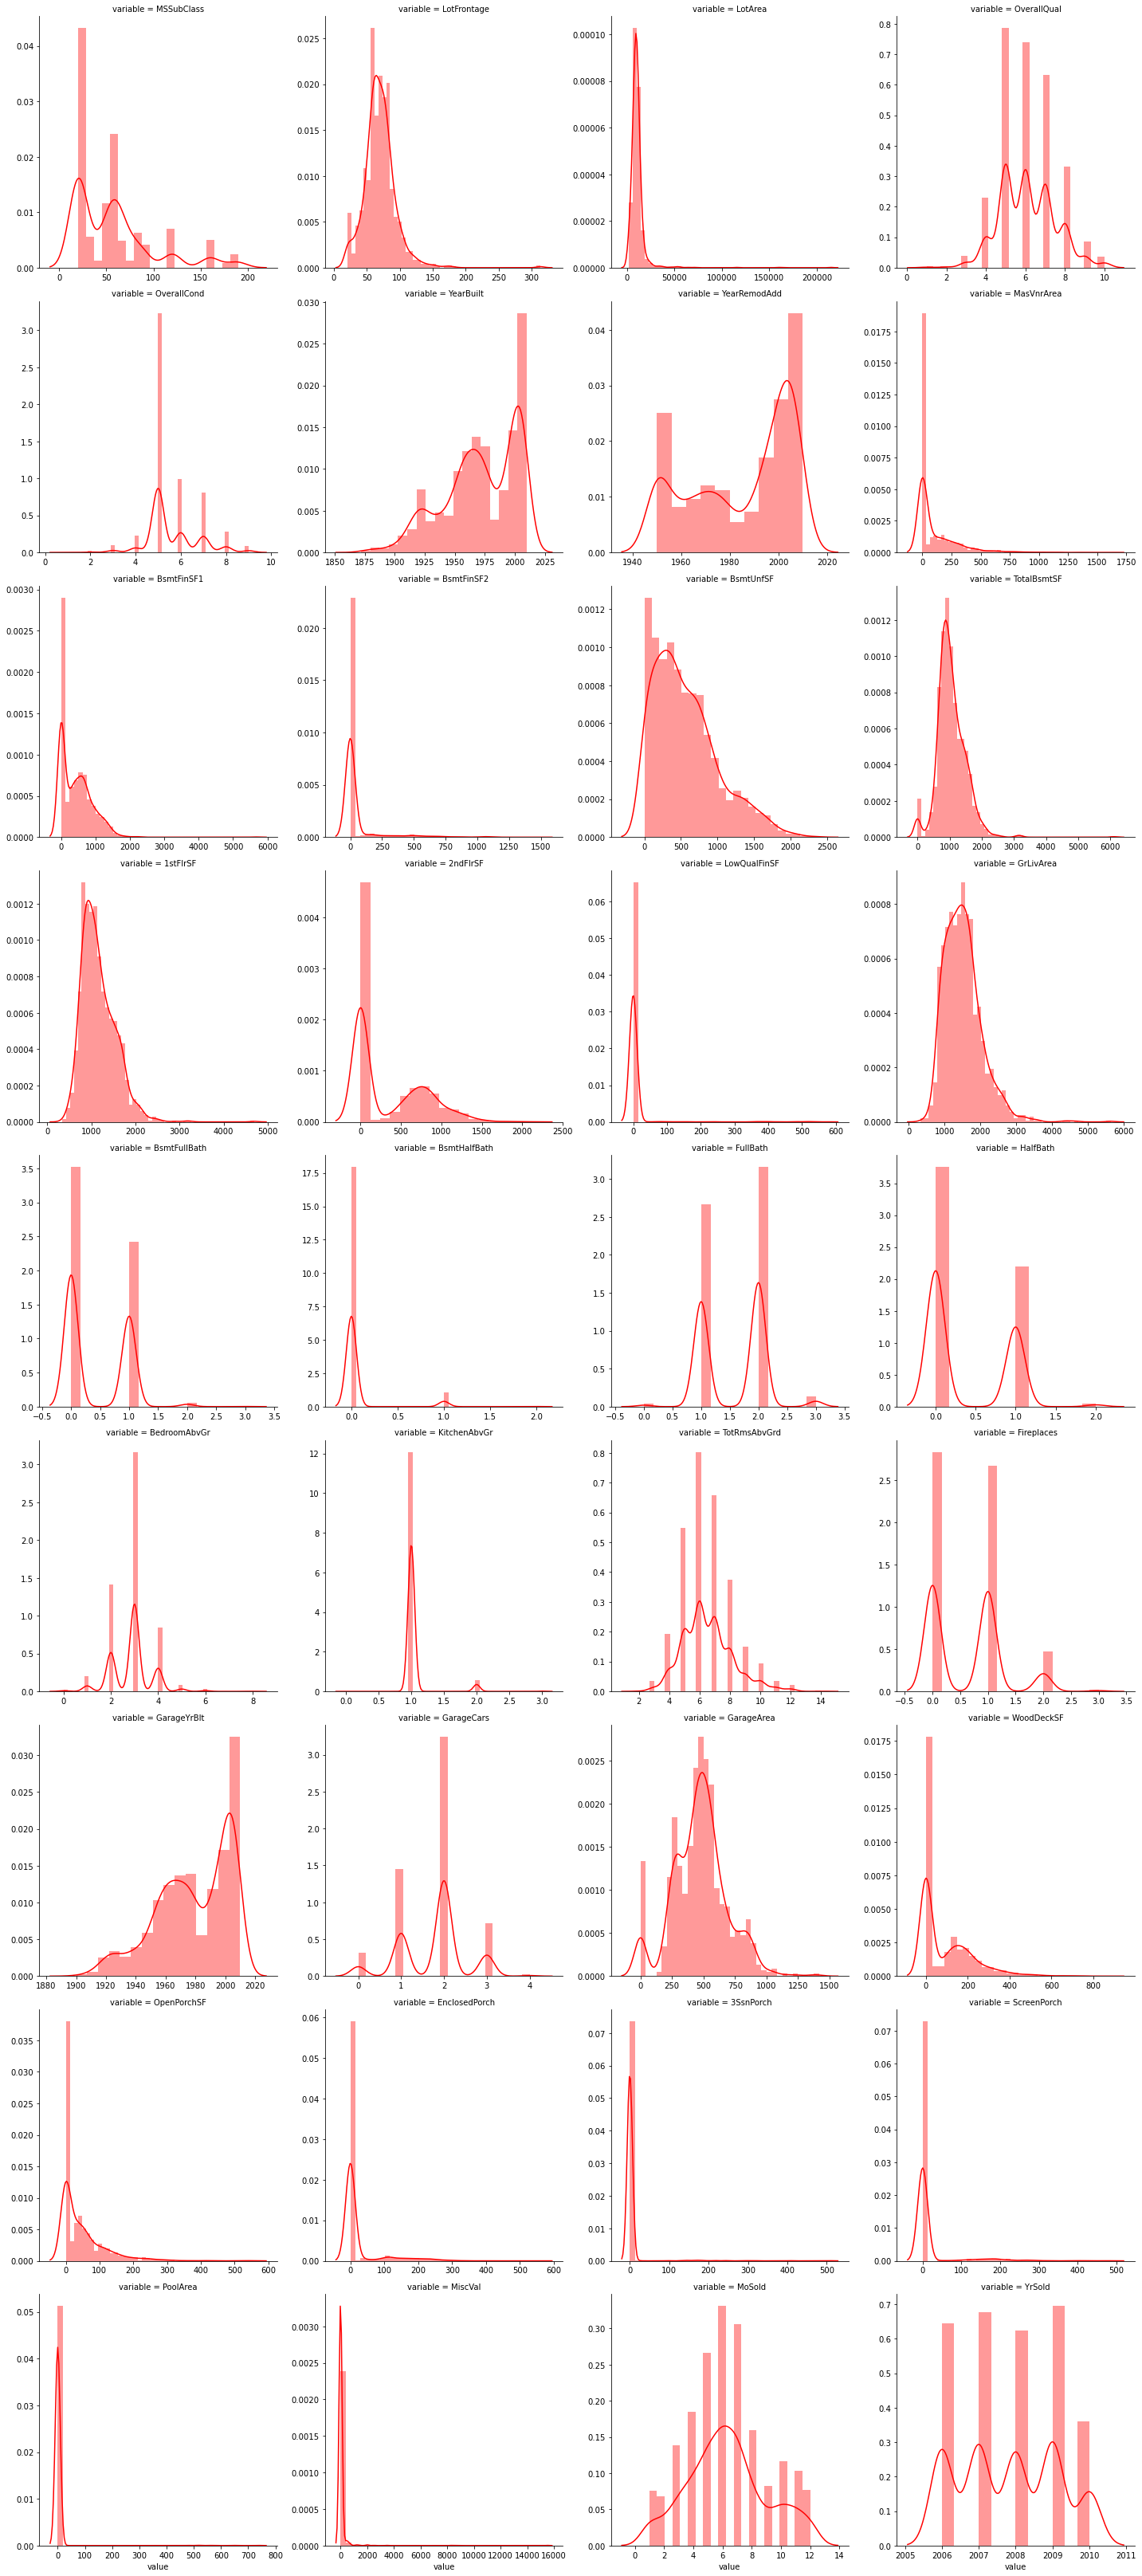

In [8]:
numeric_features = numeric_features.drop(["Id","SalePrice"])
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value", color="r")
plt.show()

In [9]:
# Summarize numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Analysis of The Target Variable SalePrice

Now let's analysize our target variable SalePrice with describe().

In [10]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalePrice has 1460 values with 180921.20 mean and 79442.50 standard deviation with minimum 34900 and maximum 755000 price.

Skewness: % 1.8828757597682129


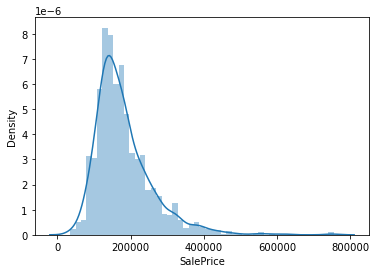

In [11]:
sns.distplot(df['SalePrice']);
print("Skewness: %", df['SalePrice'].skew())

Skewness: % 0.12133506220520406


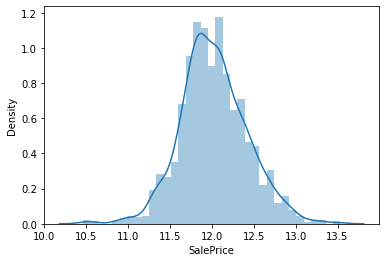

In [12]:
sns.distplot(np.log1p(df['SalePrice']));
print("Skewness: %", np.log(df['SalePrice']).skew())

The target variable SalePrice is not normally distributed. This can reduce the performance of the ML models because they assume normal distribution. Therefore we make a log transformation, the resulting distribution looks much better. But since we're not going to use a machine learning algorithm in this project there's no need to use a log transformation.

## Heatmap

Matrix heatmap help to indentify correlation between the target and other features.

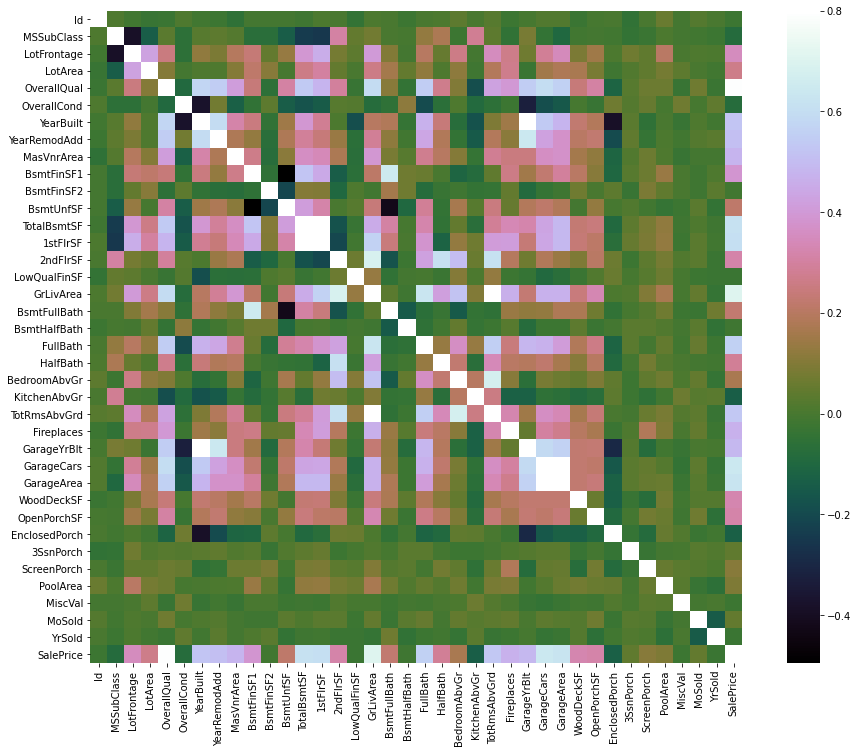

In [13]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True, cmap='cubehelix');
plt.show()

In [14]:
corr_list = corrmat['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

As we can see the most correlated values are OverallQual, GrLivArea and GarageCars. 

## Relation to SalePrice for all Numerical Features

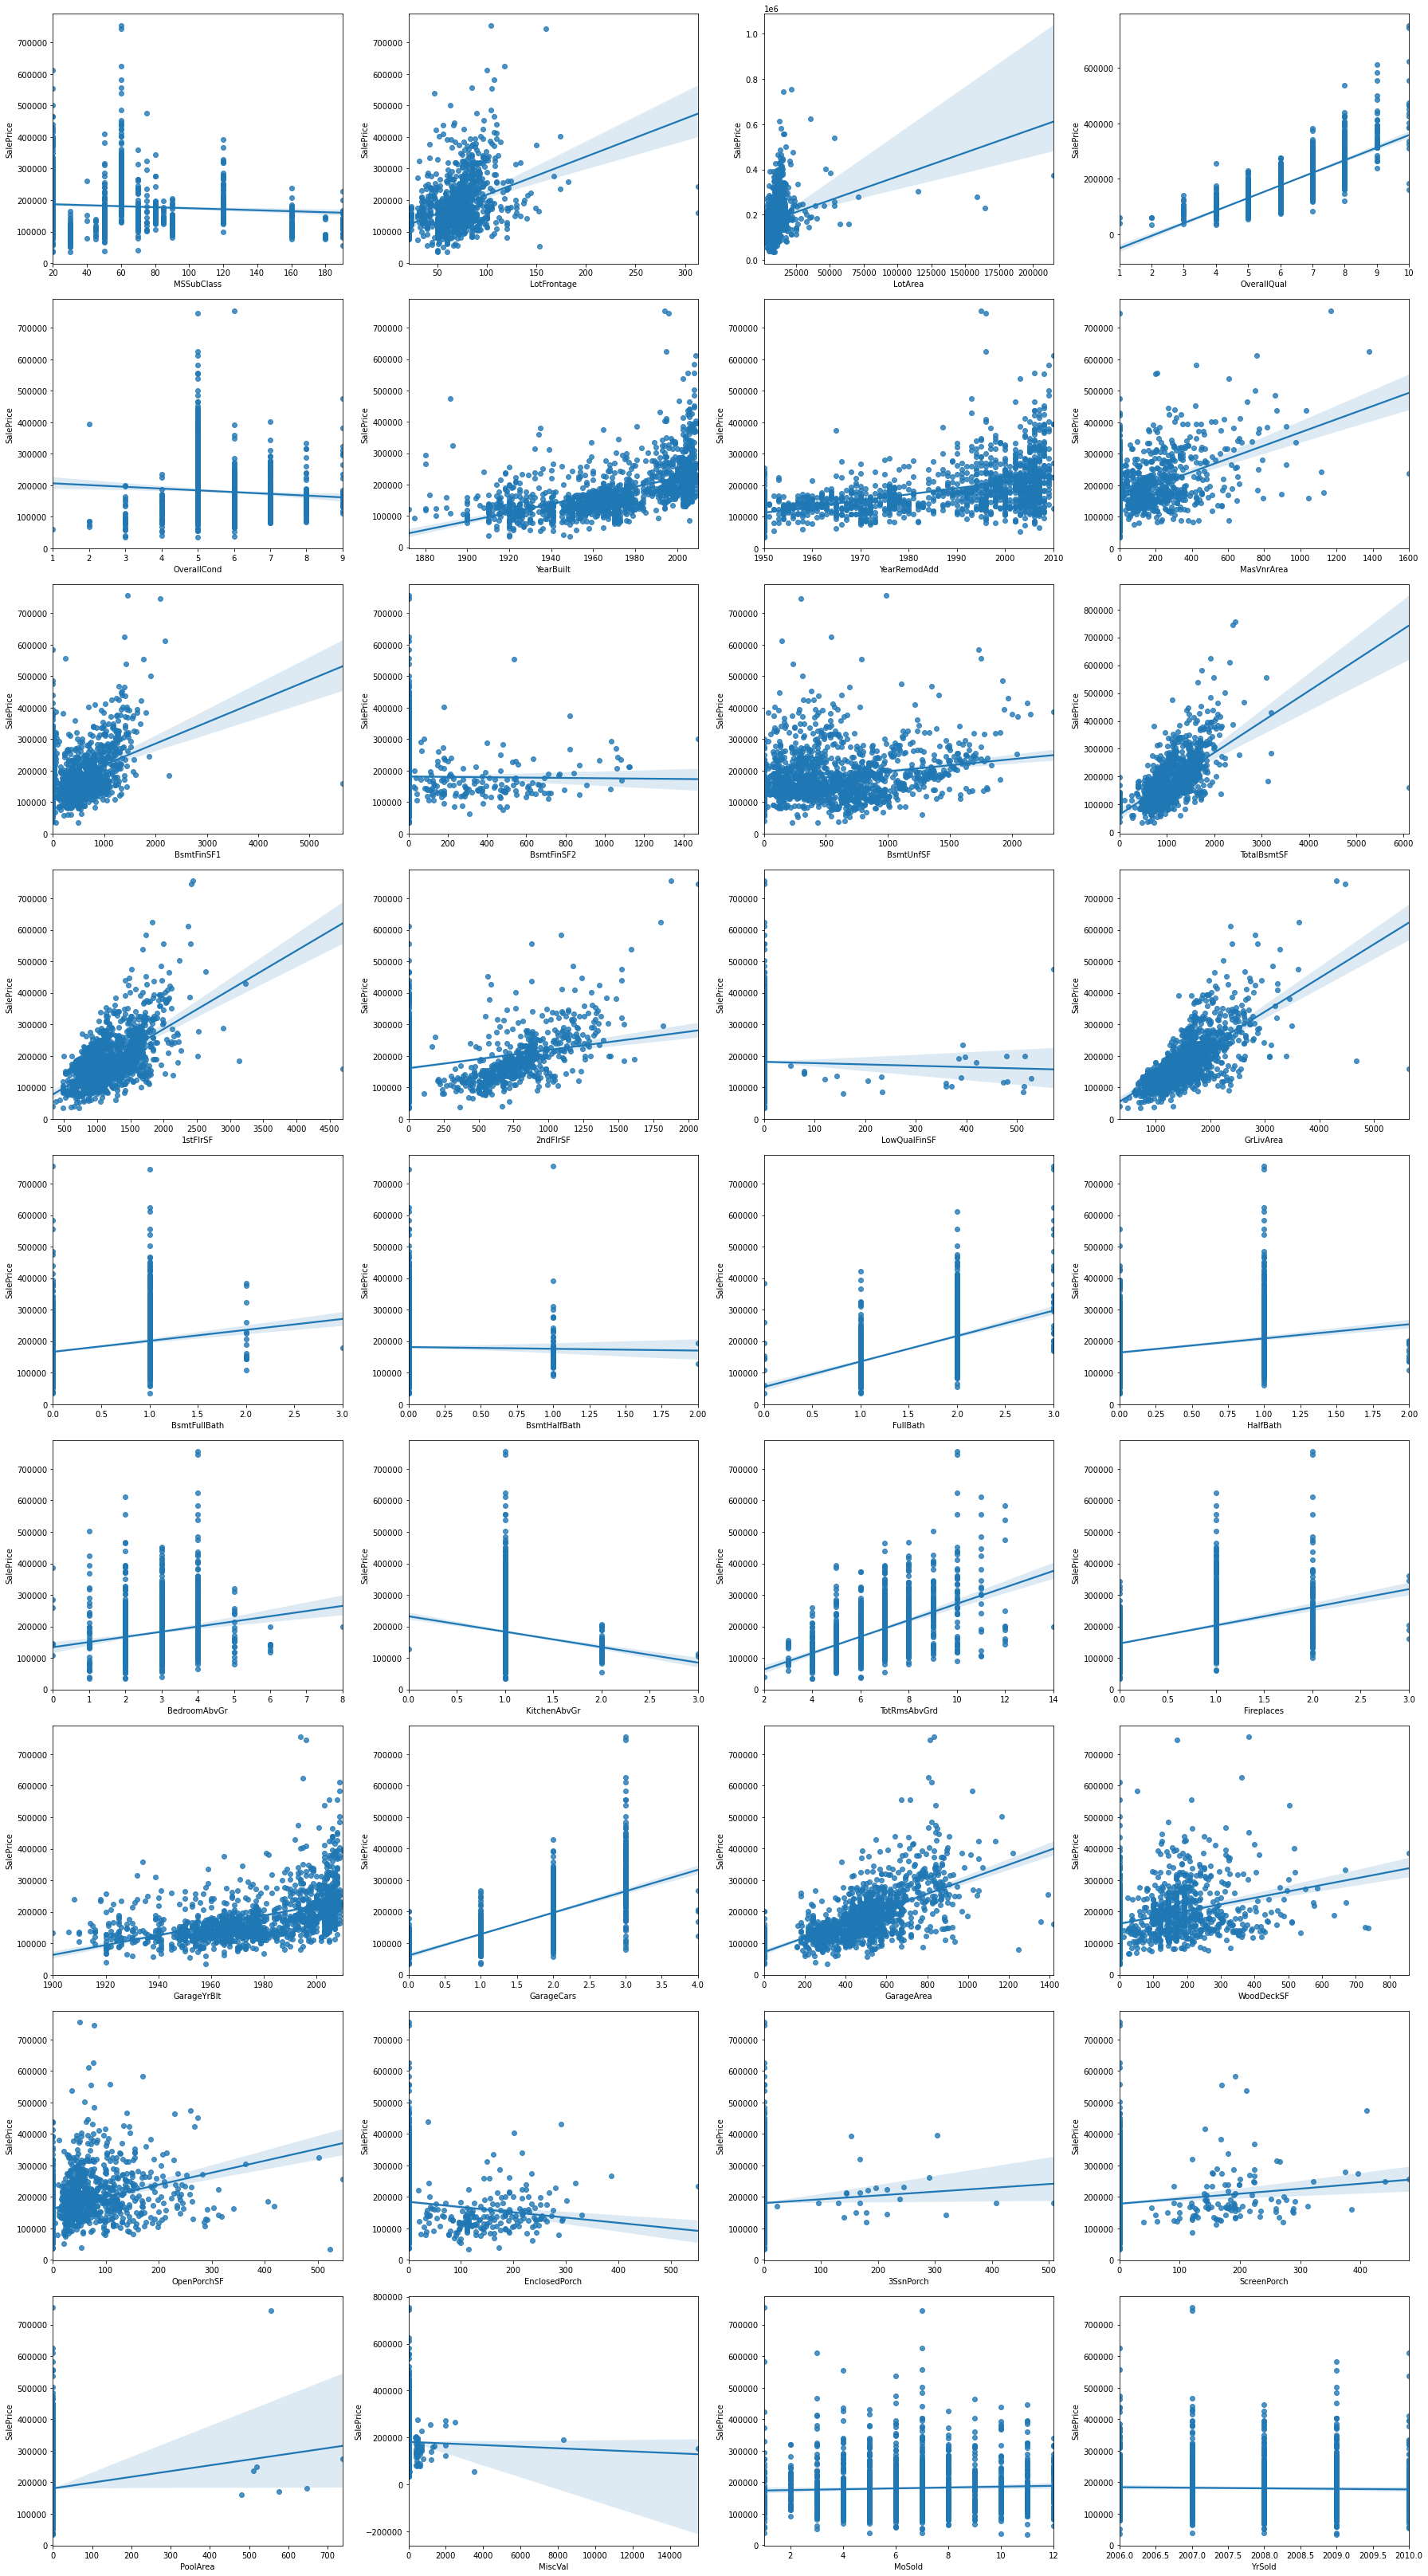

In [15]:
plt.figure(figsize=(25, 45))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(9, 4, i)
    sns.regplot(data=df, x=col, y="SalePrice")
    plt.tight_layout()

# Categorical Features

Now let's examine our categorical features with describe(). We can see that some of our features have missing values. We're going to deal with them later. 

In [16]:
df.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


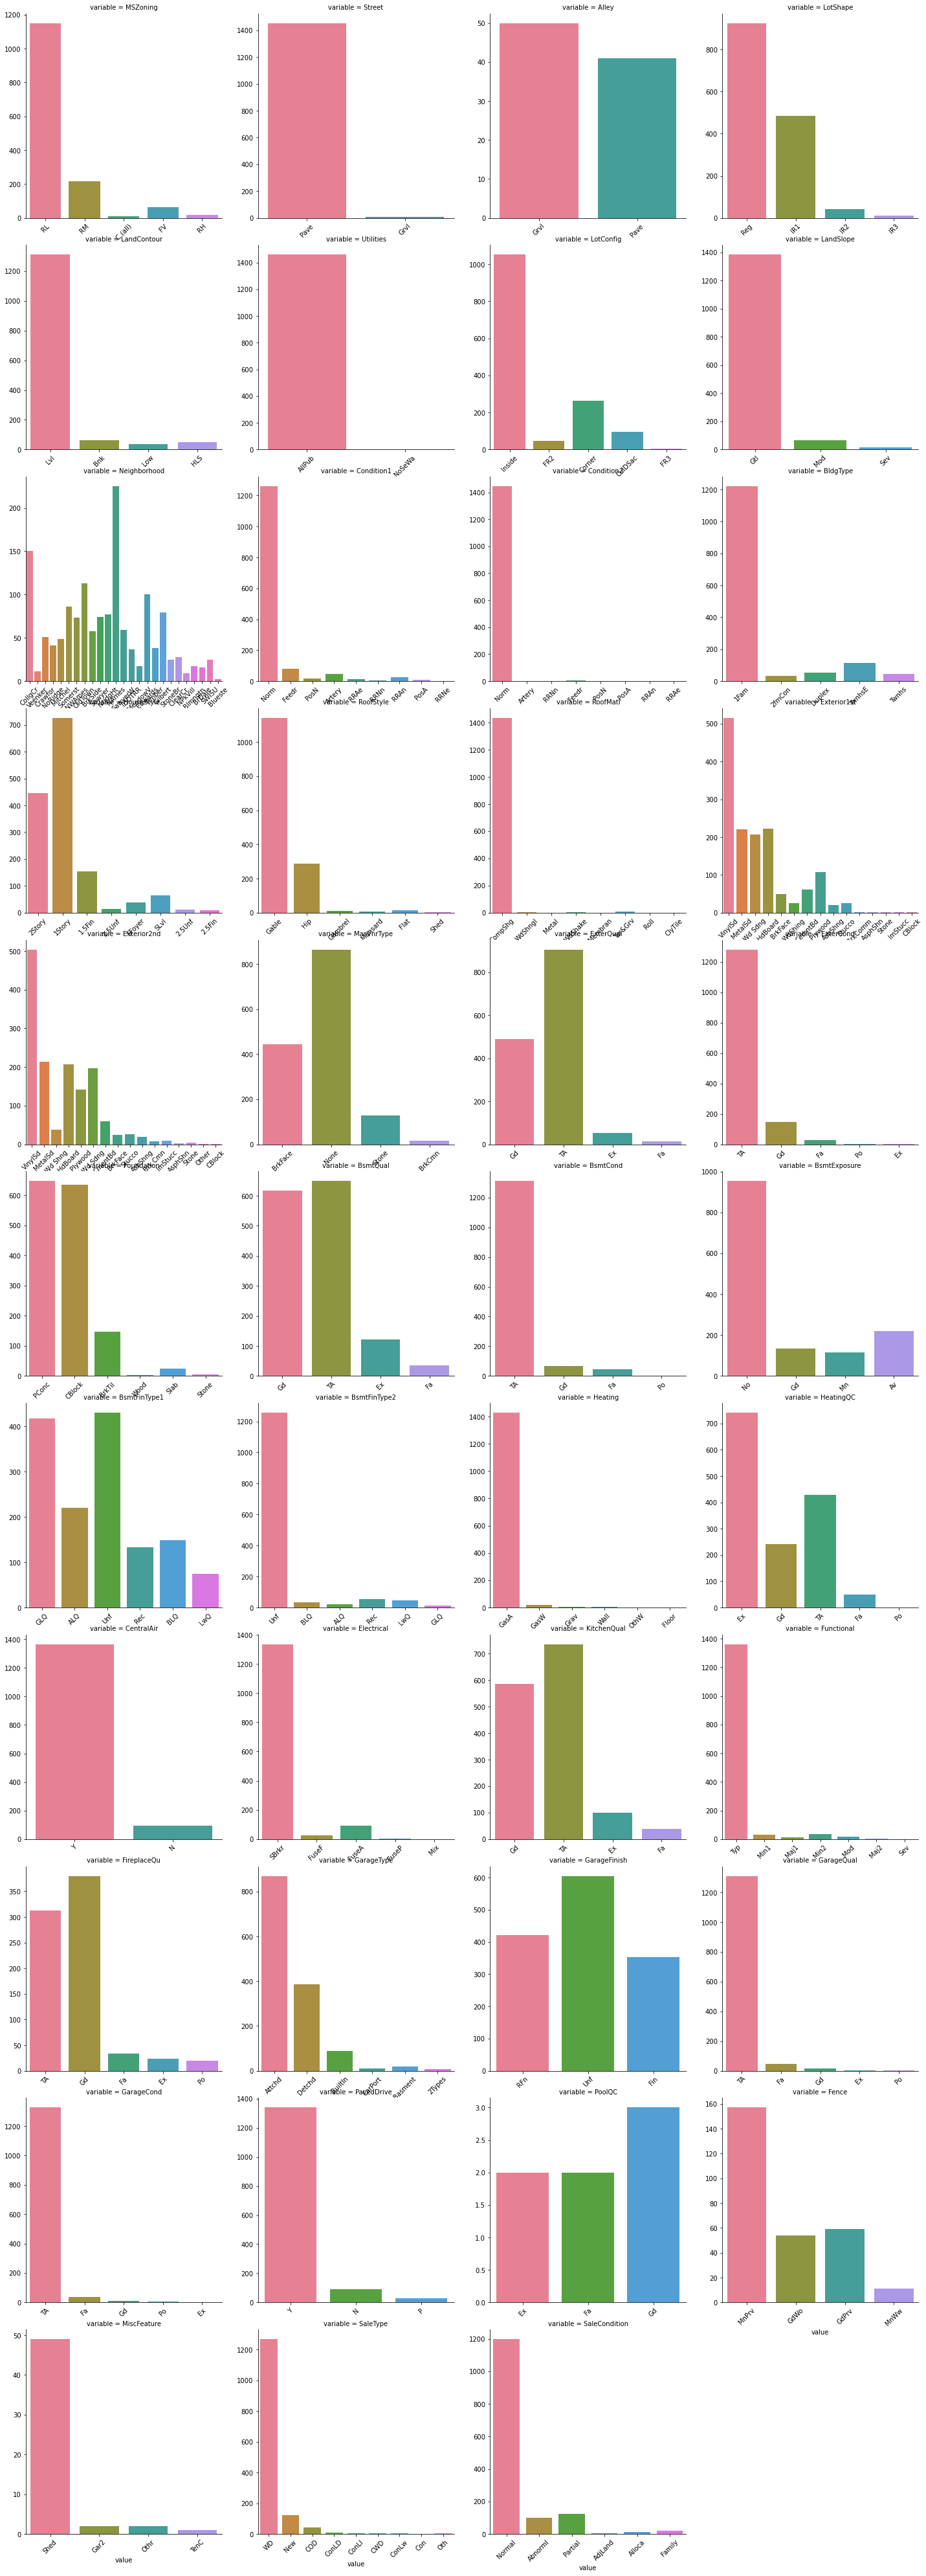

In [17]:
f = pd.melt(df, value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value", palette="husl")
g.set_xticklabels(rotation=45)
plt.show()

## Relation to SalePrice for all categorical features

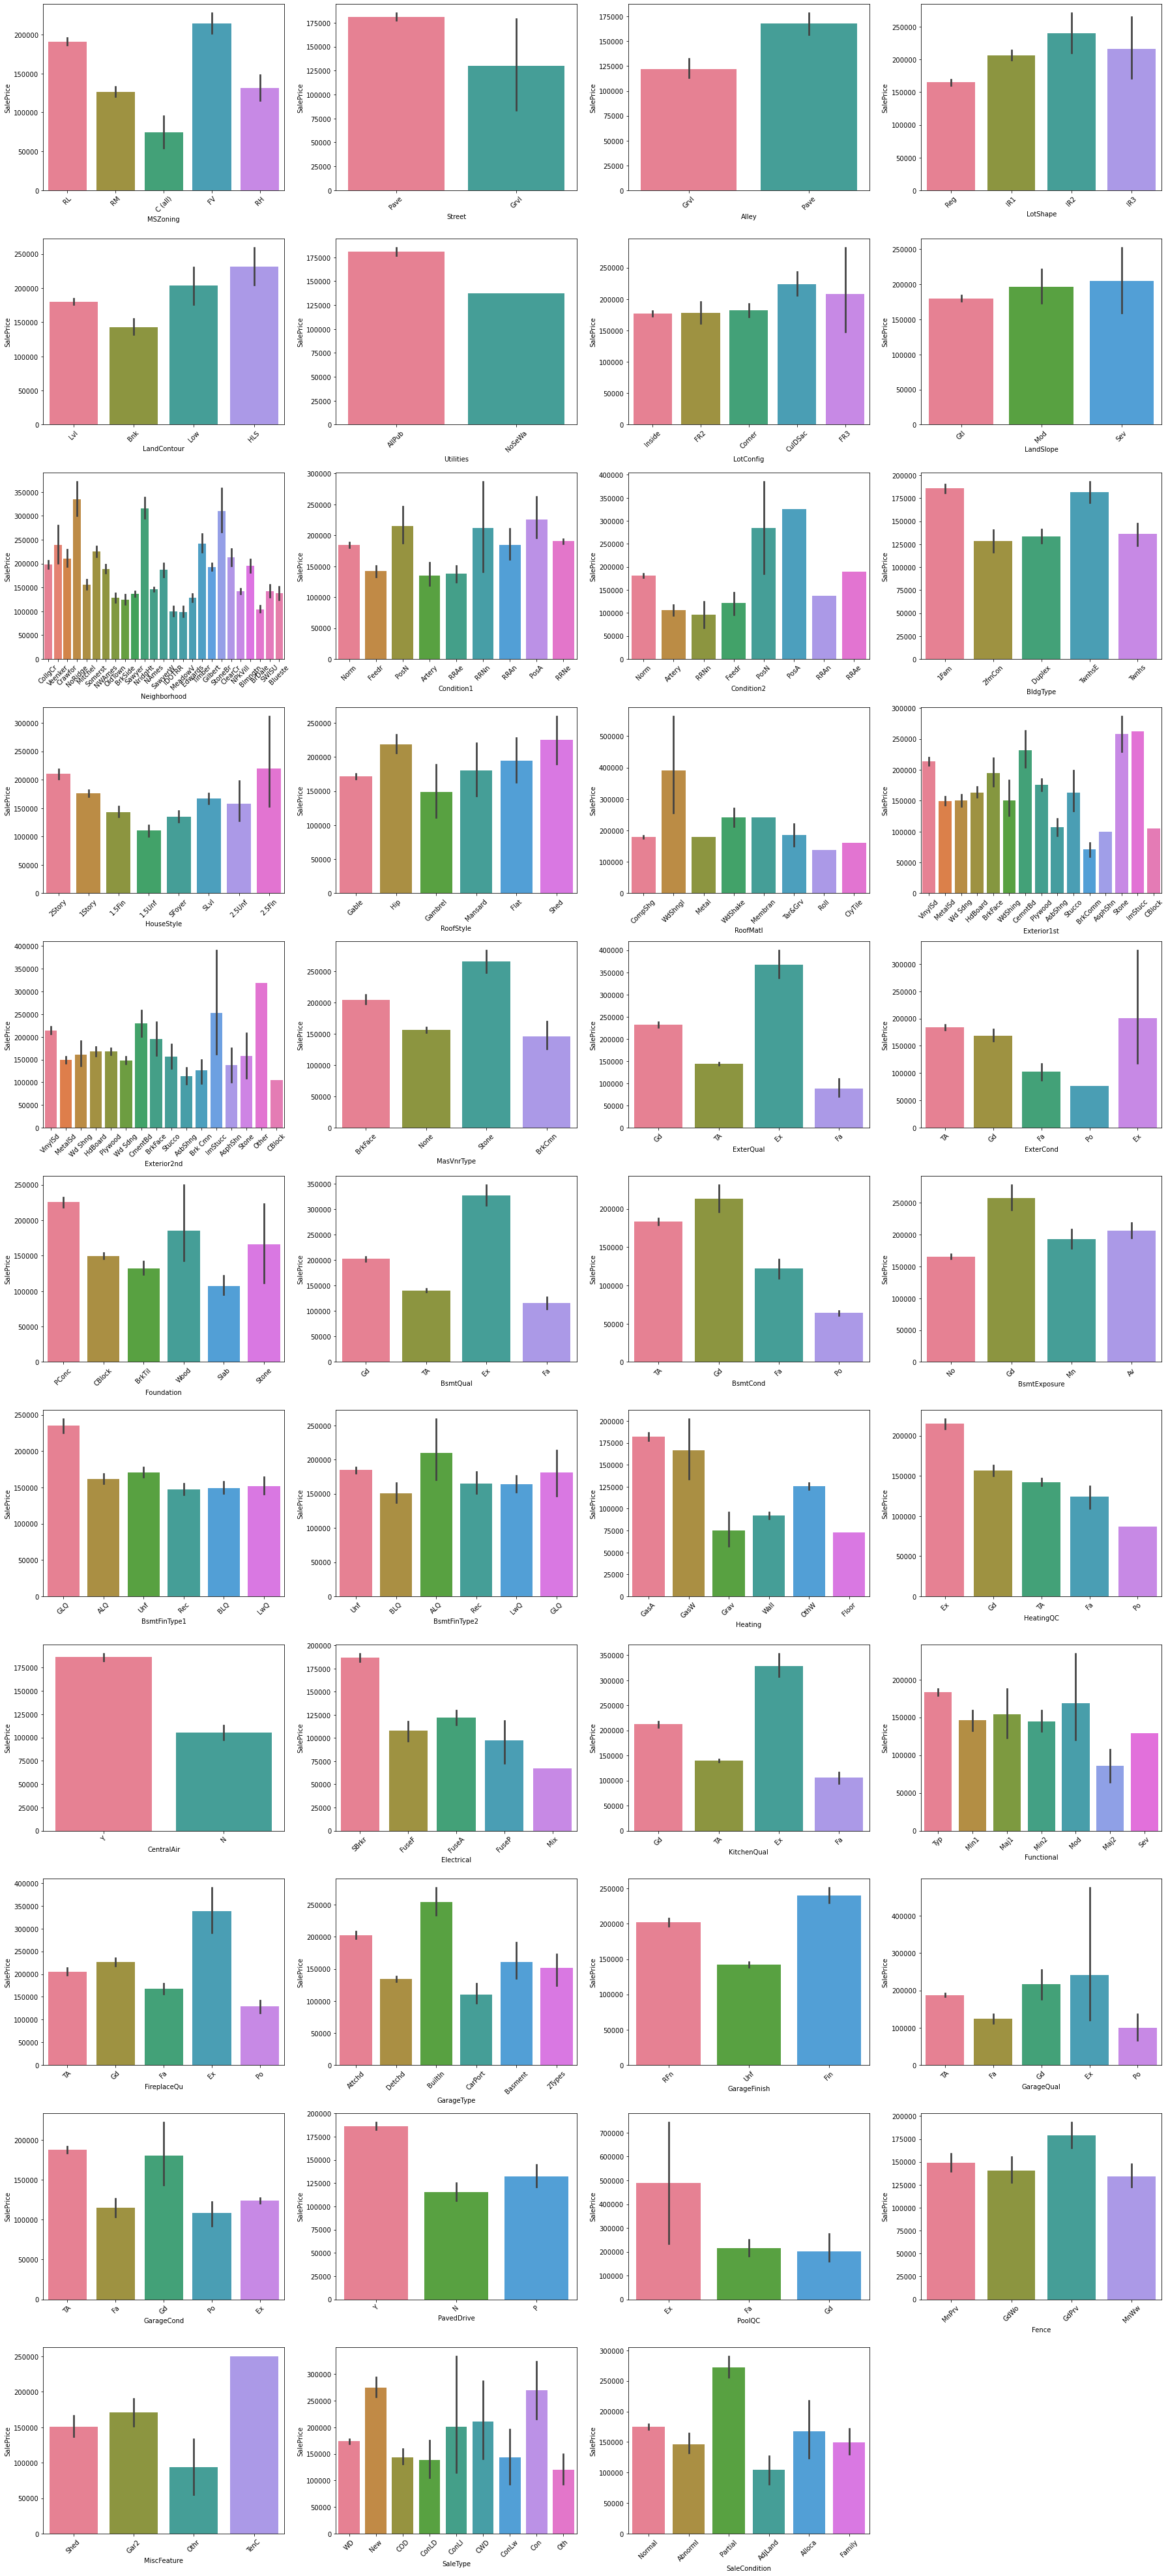

In [18]:
categorical_features = df.dtypes[df.dtypes == "object"].index
plt.figure(figsize=(25, 55))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(11, 4, i)
    sns.barplot(data=df, x=col, y="SalePrice", palette="husl")
    plt.xticks(rotation=45)
    plt.tight_layout()

## Redefining the dataset with high corralated features

Since we have 81 features we need to reduce it to work with more meaningful data.

In [19]:
df = df[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF",
         "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "Fireplaces", "2ndFlrSF", 
         "Utilities", "Heating", "BsmtQual", "BldgType","HouseStyle","OverallCond", 
         "RoofStyle", "SaleType", "SaleCondition", "PoolQC"]]
df2 = df.copy()
df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Utilities,Heating,BsmtQual,BldgType,HouseStyle,OverallCond,RoofStyle,SaleType,SaleCondition,PoolQC
0,208500,7,1710,2,856,856,2,8,2003,2003,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
1,181500,6,1262,2,1262,1262,2,6,1976,1976,...,AllPub,GasA,Gd,1Fam,1Story,8,Gable,WD,Normal,NaN
2,223500,7,1786,2,920,920,2,6,2001,2002,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
3,140000,7,1717,3,756,961,1,7,1915,1970,...,AllPub,GasA,TA,1Fam,2Story,5,Gable,WD,Abnorml,NaN
4,250000,8,2198,3,1145,1145,2,9,2000,2000,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   GarageCars     1460 non-null   int64 
 4   TotalBsmtSF    1460 non-null   int64 
 5   1stFlrSF       1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   YearBuilt      1460 non-null   int64 
 9   YearRemodAdd   1460 non-null   int64 
 10  Fireplaces     1460 non-null   int64 
 11  2ndFlrSF       1460 non-null   int64 
 12  Utilities      1460 non-null   object
 13  Heating        1460 non-null   object
 14  BsmtQual       1423 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallCond    1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [21]:
numeric_features = df.dtypes[df.dtypes != "object"].index
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Numerical features: ", len(numeric_features))
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  13
Number of Categorical features:  9


# Filling Missing Values

As we can see the SalePrice is dependant on the missing values. Therefore we have to handle missing values and we cannot simply drop it because of the dependancy. In our data PoolQC and BsmtQual values have missing values.

In [22]:
count_missing_data(df)

,Total,Percent,Data Type
PoolQC,1453,0.995205,object
BsmtQual,37,0.025342,object
YearRemodAdd,0,0.000000,int64
OverallQual,0,0.000000,int64
GrLivArea,0,0.000000,int64
GarageCars,0,0.000000,int64
TotalBsmtSF,0,0.000000,int64
1stFlrSF,0,0.000000,int64
FullBath,0,0.000000,int64
TotRmsAbvGrd,0,0.000000,int64


In [23]:
df[df["PoolQC"].isnull() == True]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Utilities,Heating,BsmtQual,BldgType,HouseStyle,OverallCond,RoofStyle,SaleType,SaleCondition,PoolQC
0,208500,7,1710,2,856,856,2,8,2003,2003,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
1,181500,6,1262,2,1262,1262,2,6,1976,1976,...,AllPub,GasA,Gd,1Fam,1Story,8,Gable,WD,Normal,NaN
2,223500,7,1786,2,920,920,2,6,2001,2002,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
3,140000,7,1717,3,756,961,1,7,1915,1970,...,AllPub,GasA,TA,1Fam,2Story,5,Gable,WD,Abnorml,NaN
4,250000,8,2198,3,1145,1145,2,9,2000,2000,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,953,2,7,1999,2000,...,AllPub,GasA,Gd,1Fam,2Story,5,Gable,WD,Normal,NaN
1456,210000,6,2073,2,1542,2073,2,7,1978,1988,...,AllPub,GasA,Gd,1Fam,1Story,6,Gable,WD,Normal,NaN
1457,266500,7,2340,1,1152,1188,2,9,1941,2006,...,AllPub,GasA,TA,1Fam,2Story,9,Gable,WD,Normal,NaN
1458,142125,5,1078,1,1078,1078,1,5,1950,1996,...,AllPub,GasA,TA,1Fam,1Story,6,Hip,WD,Normal,NaN


For PoolQC, NaN is not missing data but means no pool. We can fill these values with "None".

In [24]:
df["PoolQC"].fillna("None", inplace=True)
print("PoolQC missing value count:", len(df[df["PoolQC"].isnull()==True]))

PoolQC missing value count: 0


In [25]:
df[df["BsmtQual"].isnull()==True]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Utilities,Heating,BsmtQual,BldgType,HouseStyle,OverallCond,RoofStyle,SaleType,SaleCondition,PoolQC
17,90000,4,1296,2,0,1296,2,6,1967,1967,...,AllPub,GasA,NaN,Duplex,1Story,5,Gable,WD,Normal,None
39,82000,4,1152,0,0,1152,2,6,1955,1955,...,AllPub,GasA,NaN,Duplex,1Story,5,Gable,WD,AdjLand,None
90,109900,4,1040,2,0,1040,1,4,1950,1950,...,AllPub,GasA,NaN,1Fam,1Story,5,Gable,WD,Normal,None
102,118964,5,1535,2,0,1535,2,8,1979,1979,...,AllPub,GasA,NaN,Duplex,1Story,5,Gable,WD,Alloca,None
156,109500,5,1040,2,0,1040,1,5,1950,1950,...,AllPub,GasA,NaN,1Fam,1Story,7,Hip,WD,Normal,None
182,120000,5,1340,1,0,1340,1,7,1957,2006,...,AllPub,GasA,NaN,1Fam,1Story,6,Hip,WD,Normal,None
259,97000,5,882,1,0,882,1,4,1956,1956,...,AllPub,GasA,NaN,1Fam,1Story,5,Gable,WD,Normal,None
342,87500,3,1040,2,0,1040,2,6,1949,1950,...,AllPub,Wall,NaN,Duplex,1Story,4,Gable,WD,Normal,None
362,198500,7,1922,2,0,495,3,7,2003,2003,...,AllPub,GasA,NaN,1Fam,SFoyer,5,Gable,ConLD,Normal,None
371,134432,4,1588,2,0,1120,2,7,1959,1959,...,AllPub,GasA,NaN,1Fam,1.5Fin,4,Gable,WD,Normal,None


We can see that for all of the BsmtQual missing values the TotalBsmtSF values are 0. That means total square feet of basement area is 0 so there's no basement. With that information we can fill the missing values with "None".

In [26]:
df["BsmtQual"].fillna("None", inplace=True)
print("BsmtQual missing value count:", len(df[df["BsmtQual"].isnull()==True]))

BsmtQual missing value count: 0


In [27]:
df3 = df.copy()

# Outliers

After handling the missing values, we need to detect outliers and fix them.

In [28]:
def draw_boxplot(df, features):
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size = 5)
    g = g.map(sns.boxplot, "value", orient="v", palette="Blues")
    plt.show()

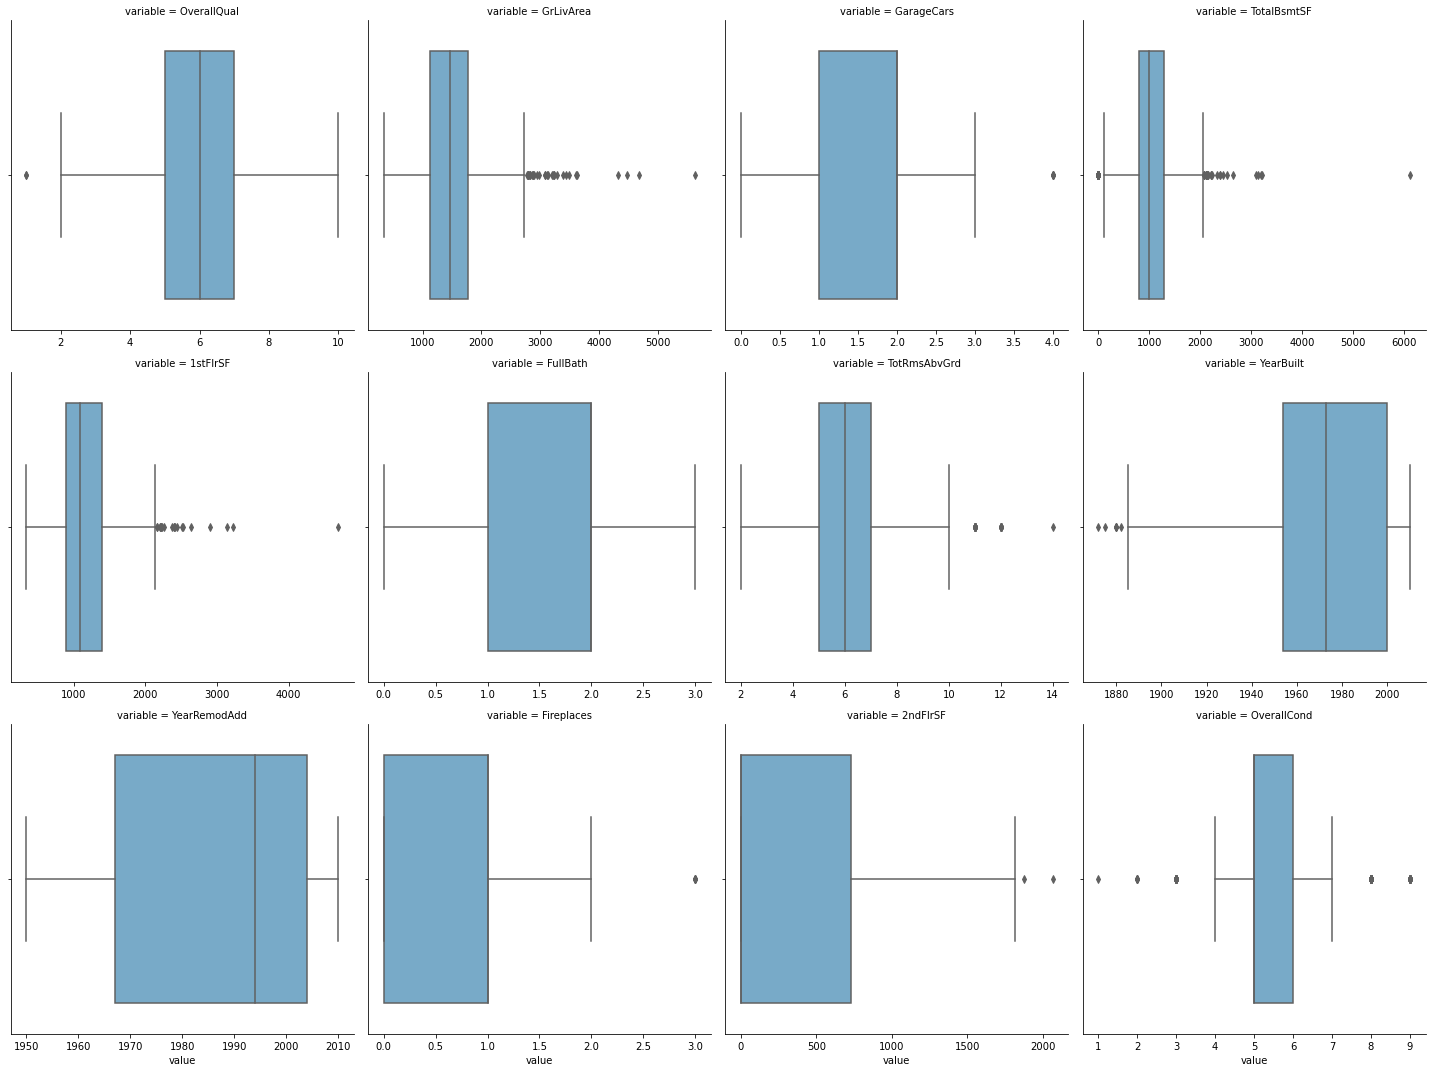

In [29]:
numeric_features = numeric_features.drop("SalePrice")
draw_boxplot(df, numeric_features)

As we can see with boxplots our features have outliers. Now let's take a statistical approach with Tukey method.

## Tukey Method

This method evaluates all values that are threshold value times the IQR as outliers. In this project our threshold value is 1.5.

In [30]:
threshold_value = 1.5
outliers = []
for feat in numeric_features:
    q75, q25 = np.percentile(df[feat].dropna(), [75 ,25])
    IQR = q75 - q25
    q75_log, q25_log = np.percentile(np.log(df[feat].dropna()), [75 ,25])
    IQR_log = q75_log - q25_log
    
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    min_value_log = q25_log - (IQR_log*threshold_value) 
    max_value_log = q75_log + (IQR_log*threshold_value)
    
    outlier_value_number = len((np.where((df[feat].dropna() > max_value)| (df[feat].dropna() < min_value))[0]))
    outlier_value_number_log = len((np.where((np.log(df[feat].dropna()) > max_value_log)| 
                                       (np.log(df[feat].dropna()) < min_value_log))[0]))
    outliers.append({'col_name':feat, 'outlier_value_number': outlier_value_number, 'outlier_value_number_log': outlier_value_number_log})
    
outlier_values = pd.DataFrame(outliers).sort_values(by='outlier_value_number', ascending = False, ignore_index=True)

In [31]:
outlier = outlier_values[outlier_values["outlier_value_number"] > 0]
outlier.set_index("col_name", inplace=True)
outlier_names = outlier.index
outlier

,outlier_value_number,outlier_value_number_log
col_name,,
OverallCond,125,125
TotalBsmtSF,61,52
GrLivArea,31,10
TotRmsAbvGrd,30,30
1stFlrSF,20,7
YearBuilt,7,9
GarageCars,5,81
Fireplaces,5,0
OverallQual,2,25


We can see that log transformation is not useful for outliers, so we are going to winsorize our features.

## Winsorize

As we did see earlier from boxplots our features have its outliers lowest end, highest end or both ends. With that information we can limit the winsorize percentiles.

In [32]:
def outlier_numbers(col):
    q75, q25 = np.percentile(df[col].dropna(), [75 ,25])
    iqr = q75 - q25
    max = len(df[df[col] > (iqr + np.percentile(df[col], 75))].index)
    min = len(df[df[col] < (np.percentile(df[col], 25) - iqr)].index)
    return min, max

In [33]:
from scipy.stats.mstats import winsorize
winsorized = []
for i in range(len(outlier)):
    col = outlier_names[i]
    min, max = outlier_numbers(col)
    if (min > 0) and (max > 0):
        winsorized.append(winsorize(np.array(df[col]), (0.10, 0.10)))
    elif min > 0:
        winsorized.append(winsorize(np.array(df[col]), (0.05, 0)))
    else:
        winsorized.append(winsorize(np.array(df[col]), (0, 0.10)))

In [34]:
wins=[]
for i in range(len(outlier)):
    wins.append(winsorized[i].data)

In [35]:
drop_values = outlier_values[outlier_values["outlier_value_number"] == 0]["col_name"]
n = numeric_features.drop(drop_values)

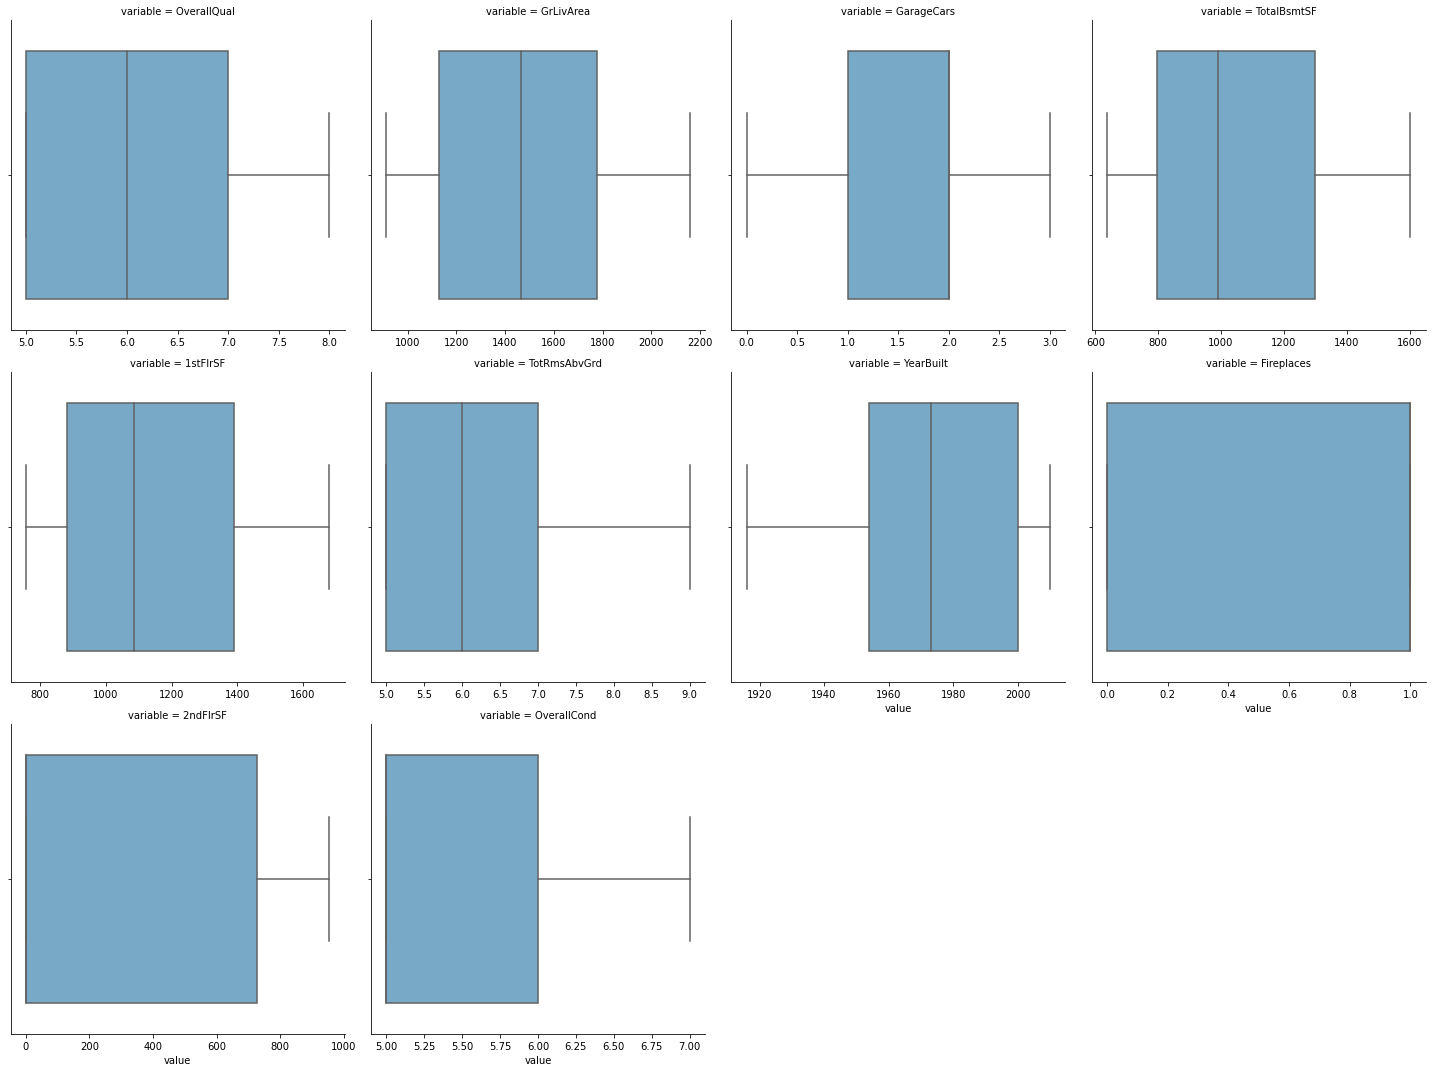

In [36]:
df_wins = pd.DataFrame(np.array(wins).T.tolist(), columns=outlier_names)
df_wins = df_wins.rename_axis(None, axis=1)
draw_boxplot(df_wins, n)

After winsorizing we replace the features with its winsorized versions.

In [37]:
columns_to_overwrite = df_wins.columns
df.drop(labels=columns_to_overwrite, axis="columns", inplace=True)
df[columns_to_overwrite] = df_wins[columns_to_overwrite]
df.head()

,SalePrice,FullBath,YearRemodAdd,Utilities,Heating,BsmtQual,BldgType,HouseStyle,RoofStyle,SaleType,...,OverallCond,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,YearBuilt,GarageCars,Fireplaces,OverallQual,2ndFlrSF
0,208500,2,2003,AllPub,GasA,Gd,1Fam,2Story,Gable,WD,...,5,856,1710,8,856,2003,2,0,7,854
1,181500,2,1976,AllPub,GasA,Gd,1Fam,1Story,Gable,WD,...,7,1262,1262,6,1262,1976,2,1,6,0
2,223500,2,2002,AllPub,GasA,Gd,1Fam,2Story,Gable,WD,...,5,920,1786,6,920,2001,2,1,7,866
3,140000,1,1970,AllPub,GasA,TA,1Fam,2Story,Gable,WD,...,5,756,1717,7,961,1916,3,1,7,756
4,250000,2,2000,AllPub,GasA,Gd,1Fam,2Story,Gable,WD,...,5,1145,2158,9,1145,2000,3,1,8,954


# T-Test

In [38]:
def ttest_df(name):
    data_unique = df[name].unique()
    comparison = pd.DataFrame(columns=['group_1','group_2','statistic', 'p_value'])
    print("\nComparison SalePrice and", name)
    for i in range(0, len(data_unique)):
        for j in range(i+1, len(data_unique)):
            ttest = stats.ttest_ind(df[df[name]==data_unique[i]]["SalePrice"],
                              df[df[name]==data_unique[j]]["SalePrice"])
            group_1 = data_unique[i]
            group_2 = data_unique[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 ,
                                      "statistic":statistic, "p_value":p_value}, ignore_index=True)
    display(comparison)

In [39]:
categorical_features = df.dtypes[df.dtypes == "object"].index
for i in range(len(categorical_features)):
    ttest_df(categorical_features[i])


Comparison SalePrice and Utilities


,group_1,group_2,statistic,p_value
0,AllPub,NoSeWa,NaN,NaN



Comparison SalePrice and Heating


,group_1,group_2,statistic,p_value
0,GasA,GasW,0.818660,0.413116
1,GasA,Grav,3.561074,0.000381
2,GasA,Wall,2.268138,0.023469
3,GasA,OthW,1.003642,0.315721
4,GasA,Floor,NaN,NaN
5,GasW,Grav,2.971053,0.006839
6,GasW,Wall,1.861359,0.077457
7,GasW,OthW,0.718441,0.481708
8,GasW,Floor,NaN,NaN
9,Grav,Wall,-1.164128,0.274303



Comparison SalePrice and BsmtQual


,group_1,group_2,statistic,p_value
0,Gd,TA,21.548613,5.596025e-88
1,Gd,Ex,-17.824281,2.318760e-59
2,Gd,None,10.078727,2.653623e-22
3,Gd,Fa,8.768584,1.571121e-17
4,TA,Ex,-31.308186,2.557368e-139
5,TA,None,4.846974,1.552472e-06
6,TA,Fa,3.353380,8.424507e-04
7,Ex,None,11.715632,3.845244e-23
8,Ex,Fa,10.844288,1.028826e-20
9,None,Fa,-1.334434,1.863865e-01



Comparison SalePrice and BldgType


,group_1,group_2,statistic,p_value
0,1Fam,2fmCon,3.852022,1.230913e-04
1,1Fam,Duplex,4.543962,6.046272e-06
2,1Fam,TwnhsE,0.479505,6.316578e-01
3,1Fam,Twnhs,3.937157,8.696069e-05
4,2fmCon,Duplex,-0.729152,4.680120e-01
5,2fmCon,TwnhsE,-4.694789,6.190767e-06
6,2fmCon,Twnhs,-0.818243,4.159182e-01
7,Duplex,TwnhsE,-5.494146,1.473129e-07
8,Duplex,Twnhs,-0.334164,7.390084e-01
9,TwnhsE,Twnhs,4.595161,8.906244e-06



Comparison SalePrice and HouseStyle


,group_1,group_2,statistic,p_value
0,2Story,1Story,6.975774,5.080796e-12
1,2Story,1.5Fin,8.929663,5.254202e-18
2,2Story,1.5Unf,4.272345,2.354869e-05
3,2Story,SFoyer,5.191262,3.089909e-07
4,2Story,SLvl,3.943817,9.145926e-05
5,2Story,2.5Unf,1.987027,4.751995e-02
6,2Story,2.5Fin,-0.317268,7.511868e-01
7,1Story,1.5Fin,5.034073,5.826360e-07
8,1Story,1.5Unf,3.192958,1.467998e-03
9,1Story,SFoyer,3.215028,1.359385e-03



Comparison SalePrice and RoofStyle


,group_1,group_2,statistic,p_value
0,Gable,Hip,-9.245784,8.248565e-20
1,Gable,Gambrel,1.123262,2.615608e-01
2,Gable,Mansard,-0.361467,7.178170e-01
3,Gable,Flat,-1.255010,2.097298e-01
4,Gable,Shed,-1.140210,2.544380e-01
5,Hip,Gambrel,2.063895,3.990195e-02
6,Hip,Mansard,0.904513,3.664719e-01
7,Hip,Flat,0.775415,4.387115e-01
8,Hip,Shed,-0.077466,9.383067e-01
9,Gambrel,Mansard,-1.026297,3.200186e-01



Comparison SalePrice and SaleType


,group_1,group_2,statistic,p_value
0,WD,New,-14.381562,8.105759e-44
1,WD,COD,2.692506,7.182281e-03
2,WD,ConLD,1.456982,1.453676e-01
3,WD,ConLI,-0.842546,3.996410e-01
4,WD,CWD,-1.043691,2.968273e-01
5,WD,ConLw,0.932039,3.514936e-01
6,WD,Con,-1.910994,5.623085e-02
7,WD,Oth,1.303342,1.926945e-01
8,New,COD,8.017887,1.974724e-13
9,New,ConLD,3.907602,1.497076e-04



Comparison SalePrice and SaleCondition


,group_1,group_2,statistic,p_value
0,Normal,Abnorml,3.908521,9.765968e-05
1,Normal,Partial,-14.039472,7.738631e-42
2,Normal,AdjLand,2.037914,4.177744e-02
3,Normal,Alloca,0.386064,6.995175e-01
4,Normal,Family,1.635624,1.021770e-01
5,Abnorml,Partial,-9.901244,2.103753e-19
6,Abnorml,AdjLand,1.017978,3.110735e-01
7,Abnorml,Alloca,-0.823099,4.122165e-01
8,Abnorml,Family,-0.160442,8.728051e-01
9,Partial,AdjLand,3.228674,1.582958e-03



Comparison SalePrice and PoolQC


,group_1,group_2,statistic,p_value
0,None,Ex,-5.558614,3.230746e-08
1,None,Fa,-0.634634,5.257673e-01
2,None,Gd,-0.477903,6.327911e-01
3,Ex,Fa,1.066752,3.978015e-01
4,Ex,Gd,1.470492,2.377875e-01
5,Fa,Gd,0.250993,8.180287e-01


For many of the categorical features there is no strong relation to the target. However, for some fetaures it is easy to find a strong relation. From the figures above these are : 'RoofStyle','SaleType','PoolQC'.

In [40]:
categorical_strong_corr = ["RoofStyle", "SaleType", "PoolQC"]
categorical_weak_corr = ["BsmtQual","Utilities","Heating","BldgType","HouseStyle","SaleCondition"]
df.drop(categorical_weak_corr, inplace= True, axis = 1)
df4 = df.copy()

## Bivariate Analysis 

#### RoofStyle vs. SaleType

In [41]:
cat1 = pd.crosstab(df["RoofStyle"], df["SaleType"])
cat1

SaleType,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
RoofStyle,,,,,,,,,
Flat,0,0,0,0,0,0,0,0,13
Gable,32,3,2,7,5,5,86,3,998
Gambrel,0,0,0,0,0,0,0,0,11
Hip,11,1,0,2,0,0,36,0,236
Mansard,0,0,0,0,0,0,0,0,7
Shed,0,0,0,0,0,0,0,0,2


In [42]:
stat, p_value = stats.chisquare(cat1, axis=None)
print("RoofStyle and SaleType")
print("Statistic:", stat, ", P value:", p_value)

RoofStyle and SaleType
Statistic: 37819.67397260274 , P value: 0.0


P value of 0 and test statistic of 37819.67 indicate that differences are statistically significant.

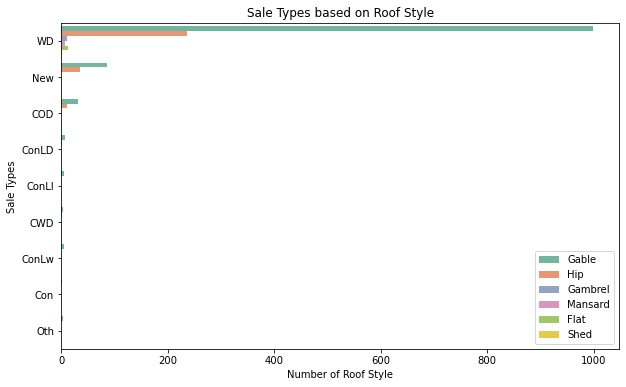

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(y="SaleType", hue="RoofStyle", data=df, palette="Set2")
plt.title("Sale Types based on Roof Style")
plt.ylabel("Sale Types")
plt.xlabel("Number of Roof Style")
plt.legend(loc=4)
plt.show()

#### RoofStyle vs. PoolQC

In [44]:
cat2 = pd.crosstab(df["RoofStyle"], df["PoolQC"])
cat2

PoolQC,Ex,Fa,Gd,None
RoofStyle,,,,
Flat,0,0,1,12
Gable,1,1,1,1138
Gambrel,0,0,0,11
Hip,1,1,1,283
Mansard,0,0,0,7
Shed,0,0,0,2


In [45]:
stat, p_value = stats.chisquare(cat2, axis=None)
print("RoofStyle and PoolQC")
print("Statistic:", stat, ", P value:", p_value)

RoofStyle and PoolQC
Statistic: 21150.26849315069 , P value: 0.0


P value of 0 and test statistic of 21150.27 indicate that differences are statistically significant.

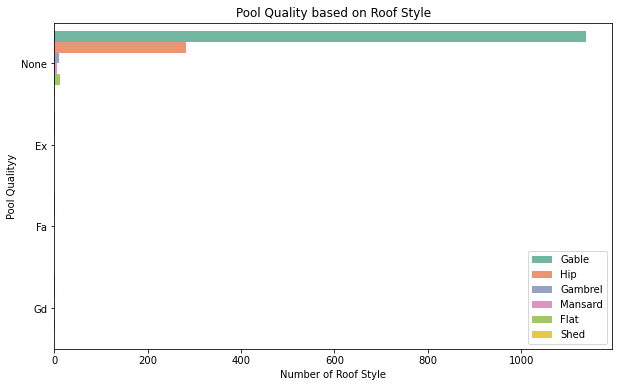

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(y="PoolQC", hue="RoofStyle", data=df, palette="Set2")
plt.title("Pool Quality based on Roof Style")
plt.ylabel("Pool Qualityy")
plt.xlabel("Number of Roof Style")
plt.legend(loc=4)
plt.show()

#### SaleType vs. PoolQC

In [47]:
cat3 = pd.crosstab(df["SaleType"], df["PoolQC"])
cat3

PoolQC,Ex,Fa,Gd,None
SaleType,,,,
COD,0,0,0,43
CWD,0,0,0,4
Con,0,0,0,2
ConLD,0,0,0,9
ConLI,0,0,0,5
ConLw,0,0,0,5
New,0,0,1,121
Oth,0,0,0,3
WD,2,2,2,1261


In [48]:
stat, p_value = stats.chisquare(cat3, axis=None)
print("SaleType and PoolQC")
print("Statistic:", stat, ", P value:", p_value)

SaleType and PoolQC
Statistic: 38159.33150684931 , P value: 0.0


P value of 0 and test statistic of 38159.33 indicate that differences are statistically significant.

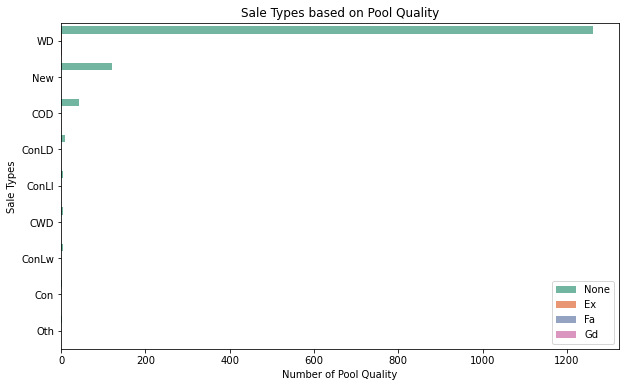

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(y="SaleType", hue="PoolQC", data=df, palette="Set2")
plt.title("Sale Types based on Pool Quality")
plt.ylabel("Sale Types")
plt.xlabel("Number of Pool Quality")
plt.legend(loc=4)
plt.show()

### List of numerical features and their correlation coefficient to target

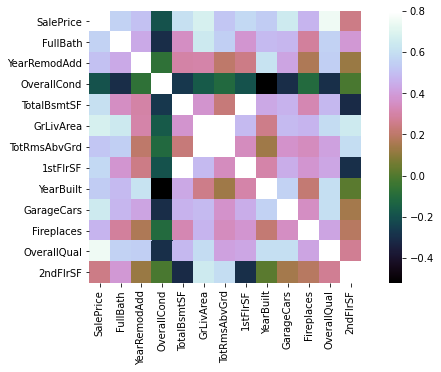

In [50]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True, cmap='cubehelix');
plt.show()

In [51]:
corr_list = corrmat['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

OverallQual     0.752940
GrLivArea       0.678386
GarageCars      0.646652
TotalBsmtSF     0.607727
1stFlrSF        0.582957
FullBath        0.560664
YearBuilt       0.538776
TotRmsAbvGrd    0.523909
YearRemodAdd    0.507101
Fireplaces      0.471908
2ndFlrSF        0.249478
OverallCond    -0.194561
Name: SalePrice, dtype: float64

## Converting Categorical Columns to Numerical

In [52]:
for catg in categorical_strong_corr :
    g = df.groupby(catg)["SalePrice"].count()
    print(g)

RoofStyle
Flat         13
Gable      1141
Gambrel      11
Hip         286
Mansard       7
Shed          2
Name: SalePrice, dtype: int64
SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: SalePrice, dtype: int64
PoolQC
Ex         2
Fa         2
Gd         3
None    1453
Name: SalePrice, dtype: int64


As we can see, there are 3 categorical features in our dataset: RoofStyle, SaleType and PoolQC. RoofStyle and SaleType features consist of nominal values. We can use Pandas' .get_dummies() method to apply one-hot encoding to convert these variables. PoolQC feature consists of ordinal values, we can use label encoding to convert it.

In [53]:
df.head()

,SalePrice,FullBath,YearRemodAdd,RoofStyle,SaleType,PoolQC,OverallCond,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,YearBuilt,GarageCars,Fireplaces,OverallQual,2ndFlrSF
0,208500,2,2003,Gable,WD,None,5,856,1710,8,856,2003,2,0,7,854
1,181500,2,1976,Gable,WD,None,7,1262,1262,6,1262,1976,2,1,6,0
2,223500,2,2002,Gable,WD,None,5,920,1786,6,920,2001,2,1,7,866
3,140000,1,1970,Gable,WD,None,5,756,1717,7,961,1916,3,1,7,756
4,250000,2,2000,Gable,WD,None,5,1145,2158,9,1145,2000,3,1,8,954


In [54]:
df = pd.get_dummies(df, prefix = "rs", columns = ["RoofStyle"], drop_first=True)
df = pd.get_dummies(df, prefix = "st", columns = ["SaleType"], drop_first=True)

In [55]:
PoolQC_categories = ["None","Fa","TA","Gd","Ex"]
df['PoolQC'].replace(to_replace=PoolQC_categories, value=[0, 1, 2, 3, 4], inplace=True)

In [56]:
df.head()

,SalePrice,FullBath,YearRemodAdd,PoolQC,OverallCond,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,1stFlrSF,YearBuilt,...,rs_Mansard,rs_Shed,st_CWD,st_Con,st_ConLD,st_ConLI,st_ConLw,st_New,st_Oth,st_WD
0,208500,2,2003,0,5,856,1710,8,856,2003,...,0,0,0,0,0,0,0,0,0,1
1,181500,2,1976,0,7,1262,1262,6,1262,1976,...,0,0,0,0,0,0,0,0,0,1
2,223500,2,2002,0,5,920,1786,6,920,2001,...,0,0,0,0,0,0,0,0,0,1
3,140000,1,1970,0,5,756,1717,7,961,1916,...,0,0,0,0,0,0,0,0,0,1
4,250000,2,2000,0,5,1145,2158,9,1145,2000,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df5 = df.copy()

# FEATURE SELECTION
## Extracting new Features using PCA

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_df = df.drop(['SalePrice'], axis=1)
X = num_df.values
X = StandardScaler().fit_transform(num_df) #returns transformed array
pca = PCA()
principalComponents=pca.fit_transform(X)

In [59]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
pd.DataFrame({'Explained Variance Ratio': exp_var, 'Cumulative Sum': cumsum_var})

,Explained Variance Ratio,Cumulative Sum
0,0.210480,21.05
1,0.091579,30.21
2,0.078585,38.07
3,0.057080,43.78
4,0.046413,48.42
5,0.040303,52.45
6,0.039507,56.40
7,0.039012,60.30
8,0.038891,64.19
9,0.038759,68.07


In [60]:
print(exp_var)
print(cumsum_var)

[0.21047976 0.09157935 0.07858501 0.05707984 0.04641262 0.04030305
 0.03950663 0.0390122  0.03889122 0.03875913 0.0386268  0.03842656
 0.0378091  0.03729257 0.0343549  0.03346771 0.02730701 0.01819211
 0.01414885 0.01255375 0.00790338 0.00758159 0.00504463 0.00450335
 0.0012263  0.00095258]
[ 21.05  30.21  38.07  43.78  48.42  52.45  56.4   60.3   64.19  68.07
  71.93  75.77  79.55  83.28  86.72  90.07  92.8   94.62  96.03  97.29
  98.08  98.84  99.34  99.79  99.91 100.01]


In [61]:
#Sorting the values of the first principal component by how large each one is
daf = pd.DataFrame({'PCA1':pca.components_[0], 'Variable Names':list(num_df.columns)})
df_sorted = daf.sort_values('PCA1', ascending=False, ignore_index=True)
df_sorted

,PCA1,Variable Names
0,0.349746,OverallQual
1,0.328872,GrLivArea
2,0.318609,GarageCars
3,0.315826,FullBath
4,0.290413,YearBuilt
5,0.288080,TotalBsmtSF
6,0.287764,1stFlrSF
7,0.267026,TotRmsAbvGrd
8,0.251016,YearRemodAdd
9,0.226021,Fireplaces


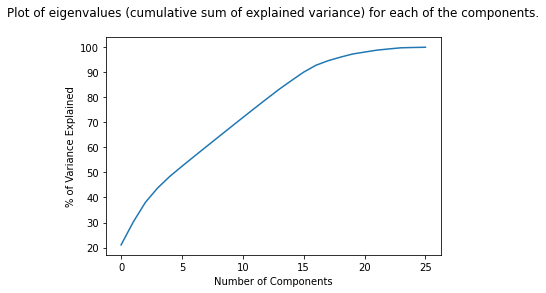

In [62]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.title("Plot of eigenvalues (cumulative sum of explained variance) for each of the components.\n")
plt.show()

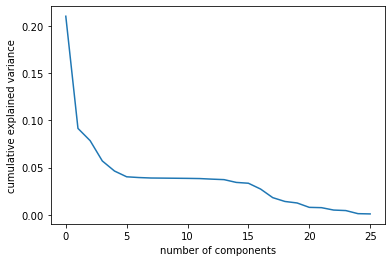

In [63]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we readily observe that after the 13th component, the contribution of the component to the variance explained drops to less than 5%. So, we can ignore these components and focus on the first 13 components:

In [64]:
X = StandardScaler().fit_transform(num_df)
pca = PCA(n_components=13)
principalComponents=pca.fit_transform(X)
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.21047976 0.09157935 0.07858501 0.05707984 0.04641262 0.04030305
 0.03950663 0.0390122  0.03889122 0.03875913 0.0386268  0.03842656
 0.0378091 ]
[21.05 30.21 38.07 43.78 48.42 52.45 56.4  60.3  64.19 68.07 71.93 75.77
 79.55]


To be interpret, first and second principal components explain 30% of the total variance and first 13 components explain nearly 80% of the total variance in movie data. Let's visualize it via cumulative scree plot.

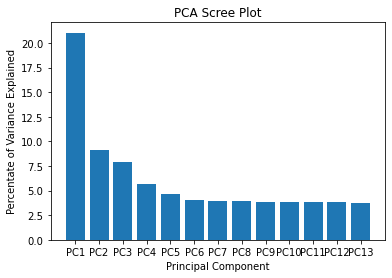

In [65]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
plt.bar(x= range(1,14), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

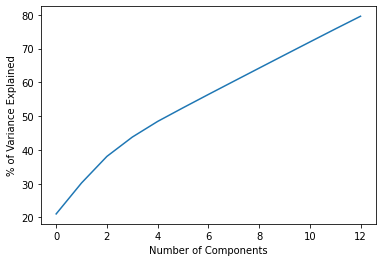

In [66]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.show()

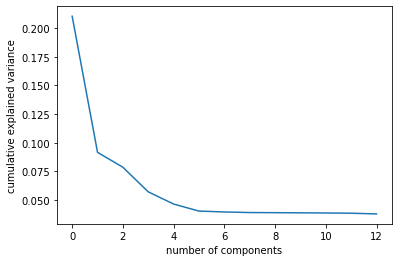

In [67]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Accordingly, the first principal component explains over 21% of the variance, second one accounts for nearly 9% of the variance and son on.